In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imsave
import seaborn as sns
import itertools
import cPickle as pickle

/home/michael/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/home/michael/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [6]:
mapper = {'warblr_challenge_baseline': 'bulbul', 
          'mel32_large_test_golden_fullsplit': 'CityBioNet',
          'aci_baseline': 'ACI*',
         'overlap_BI_baseline': 'Biotic Indices',
         'overlap_NDSI_baseline': 'NDSI',
         'overlap_ACI_Round_baseline': 'ACI',}

In [4]:
base_dir = '/media/michael/Engage/data/audio/alison_data/golden_set/'

In [1]:
def plot_pr(classname, runs):
    palette = itertools.cycle(sns.color_palette())

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)
    ax.tick_params(axis='both', which='major', labelsize=14)


    for run_type in runs:
        loaddir = base_dir + 'predictions/%s/%s/analysis/' % (run_type, classname)
        with open(loaddir + 'pr_results.pkl') as f:
            prec, recall, thresholds, prec_at_05, recall_at_05 = pickle.load(f)

        col = next(palette)
        if run_type in mapper:
            ax.plot(recall, prec, color=col, label=mapper[run_type])
        else:
            ax.plot(recall, prec, color=col, label=run_type)
        ax.plot(recall_at_05, prec_at_05, 'o', ms=8, color=col)


    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + 0.05, box.width * 0.8, box.height])


    plt.xlim(0, 1)
    plt.ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    plt.ylabel('Precision', fontsize=16)
    plt.xlabel('Recall', fontsize=16)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
    sns.set_style("whitegrid")

    plt.savefig(base_dir + 'analysis/pr_%s.png' % classname, dpi=200)
    plt.savefig(base_dir + 'analysis/pr_%s.pdf' % classname)

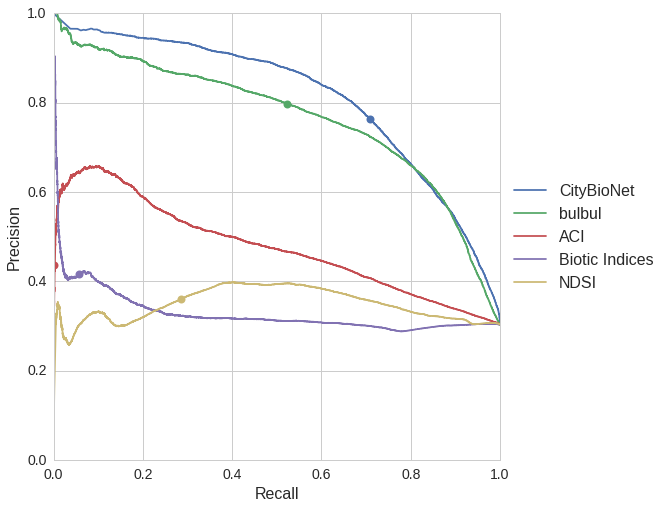

In [7]:
biotic_runs = ['mel32_large_test_golden_fullsplit','warblr_challenge_baseline', 
#         'overlap_ACI_noRound_baseline', 
#         'overlap_ACI_Round_baseline',
#        'timestep_ACI_noRound_baseline', 
        'overlap_ACI_Round_baseline',
#        'timestep_BI_baseline',
       'overlap_BI_baseline', 
#         'timestep_NDSI_baseline',
       'overlap_NDSI_baseline']
#, 'aci_baseline']

plot_pr('biotic', biotic_runs)

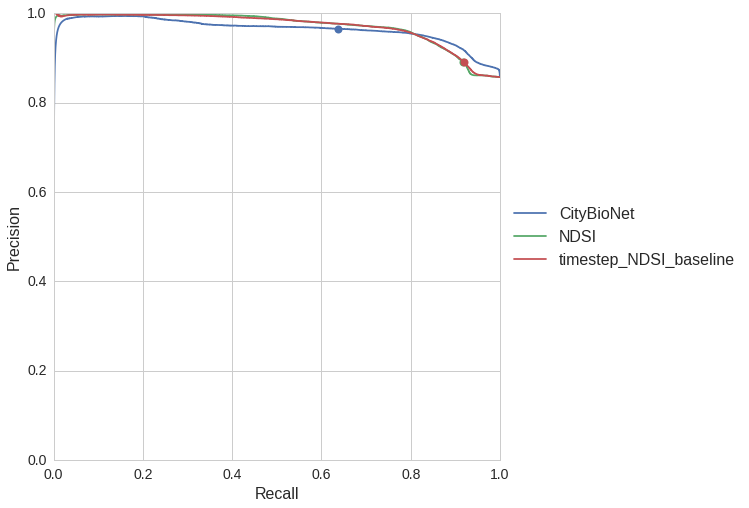

In [9]:
anthrop_runs = [
    'mel32_large_test_golden_fullsplit',
    'overlap_NDSI_baseline']

plot_pr('anthrop', anthrop_runs)